<a href="https://colab.research.google.com/github/imhilla/allmlnotebooks/blob/main/sacarsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# training sacarsm model
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-03-01 11:13:03--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2023-03-01 11:13:03 (147 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [6]:
import json

with open('./sarcasm.json', 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [8]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type = 'post'
padding_type= 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [20]:
import tensorflow as tf

emebedding_dim = 16
lstm_dim = 32
dense_dim = 24

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, emebedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 24)                1560      
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [21]:
NUM_EPOCHS = 10
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 67s 97ms/step - loss: 0.4175 - accuracy: 0.7925 - val_loss: 0.3364 - val_accuracy: 0.8542
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2215 - accuracy: 0.9104 - val_loss: 0.3481 - val_accuracy: 0.8569
Epoch 3/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1455 - accuracy: 0.9433 - val_loss: 0.3929 - val_accuracy: 0.8533
Epoch 4/10
625/625 [==============================] - 55s 89ms/step - loss: 0.0918 - accuracy: 0.9670 - val_loss: 0.4624 - val_accuracy: 0.8481
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0590 - accuracy: 0.9804 - val_loss: 0.5426 - val_accuracy: 0.8450
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.6817 - val_accuracy: 0.8350
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.7735 - val_accuracy:

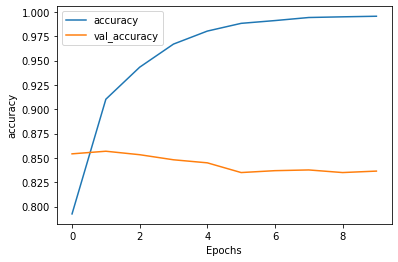

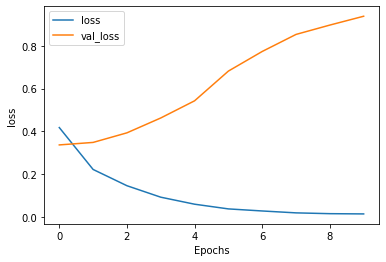

In [22]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')